# **QMP 25 CASE STUDY**


**Q.1 Understanding Error Surfaces**

In [1]:
#All imports

import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, IntSlider

In [2]:
########################################
#Generate meaningfull data
########################################
np.random.seed(48)
heights = np.linspace(55,75,25)
weights_true = 3.68*heights - 100.42
w0_true = -100.42
w1_true = 3.86
noise = np.random.normal(0,np.sqrt(20),25)
weights = weights_true + noise
df = pd.DataFrame({'Height':heights, 'Weight':weights})
print(df)

       Height      Weight
0   55.000000   97.536346
1   55.833333  100.290994
2   56.666667  105.259771
3   57.500000  115.927569
4   58.333333  113.542734
5   59.166667  122.204636
6   60.000000  111.100971
7   60.833333  126.579993
8   61.666667  134.002545
9   62.500000  127.803068
10  63.333333  143.039003
11  64.166667  131.242536
12  65.000000  136.279420
13  65.833333  132.887031
14  66.666667  143.276267
15  67.500000  142.361685
16  68.333333  160.173936
17  69.166667  156.775546
18  70.000000  164.151134
19  70.833333  168.501172
20  71.666667  158.353265
21  72.500000  159.514146
22  73.333333  176.861065
23  74.166667  168.446551
24  75.000000  177.281851


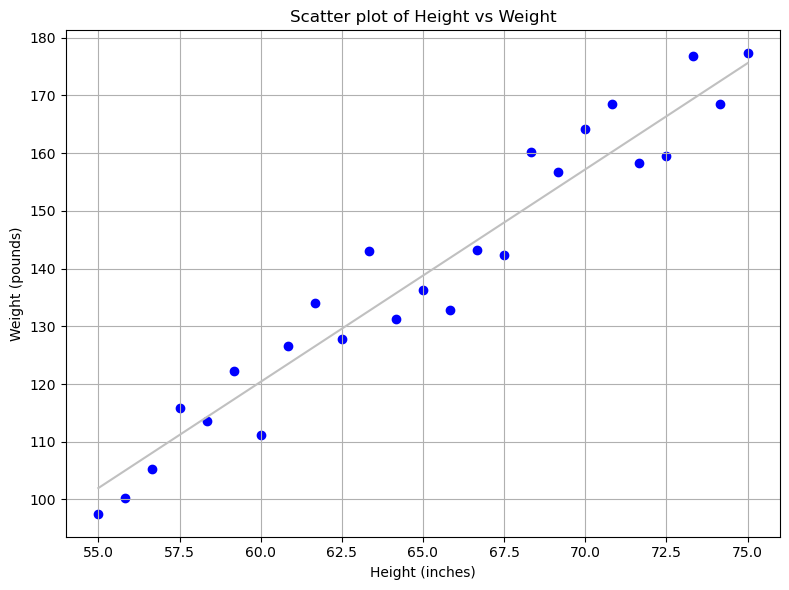

In [3]:
########################################
#Plot scatter plot of data
########################################

plt.figure(figsize=(8,6))
plt.scatter(df['Height'],df['Weight'],color='blue',label='Noisy data')
plt.plot(heights,weights_true, color='silver',label='True function')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Scatter plot of Height vs Weight')
plt.grid(True)
plt.tight_layout()
plt.show()

In [4]:
########################################
#Weight estimation through error surface, i.e., empirically locate the minima of error surface

w0_range = np.linspace(-150, -50, 100)
w1_range = np.linspace(0, 6, 100)
W0, W1 = np.meshgrid(w0_range, w1_range)

# Compute the Error
def Error(W0,W1,y,X):
  MSE = np.zeros(W0.shape)
  for i in range(25):
    MSE += (y[i] - (W0+W1*X[i]))**2
  MSE = MSE/2
  return MSE

MSE = Error(W0,W1,weights,heights)

min_index = np.unravel_index(np.argmin(MSE),MSE.shape)
empirical_w0 = W0[min_index]
empirical_w1 = W1[min_index]
min_MSE = MSE[min_index]

print(f"Minimum MSE: {min_MSE}")
print(f"Located at w0 = {empirical_w0}, w1 = {empirical_w1}")


Minimum MSE: 422.07931884894896
Located at w0 = -105.55555555555554, w1 = 3.757575757575758


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


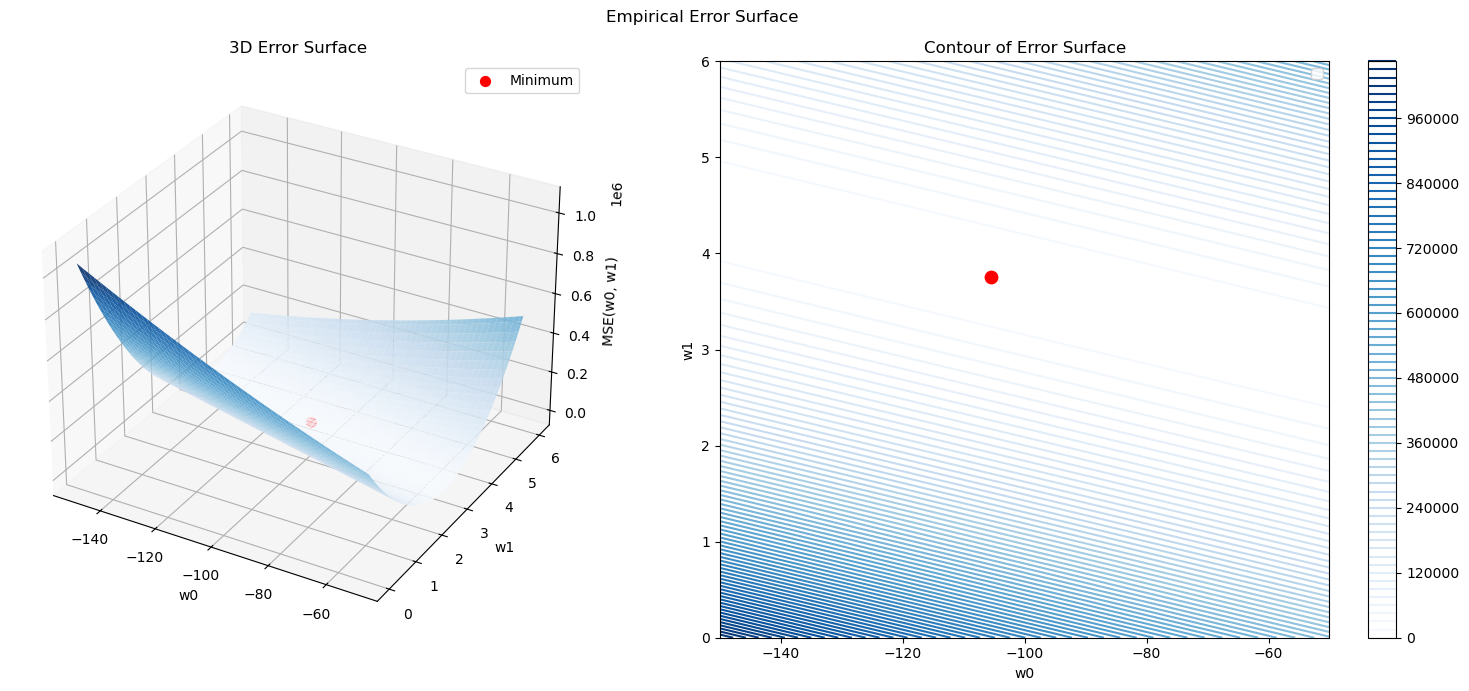

In [5]:
#Plot 3D error surface and the corresponding contour plots

fig = plt.figure(figsize=(16, 7))

# 3D Error Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(empirical_w0, empirical_w1, min_MSE, color='r', s=50, label='Minimum')
ax1.plot_surface(W0, W1, MSE, cmap='Blues', alpha=0.9)
ax1.set_xlabel('w0')
ax1.set_ylabel('w1')
ax1.set_zlabel('MSE(w0, w1)')
ax1.set_title('3D Error Surface')
ax1.legend()

# Contour Plot
# Contour Plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(W0, W1, MSE, levels=100, cmap='Blues')
plt.colorbar(contour, ax=ax2)
ax2.set_xlabel('w0')
ax2.set_ylabel('w1')
ax2.set_title('Contour of Error Surface')
ax2.scatter(empirical_w0, empirical_w1, c='red', s=80)
ax2.legend()

plt.suptitle('Empirical Error Surface')
plt.tight_layout()
plt.show()

In [6]:
# Least squares approach to estimate weights
# linear regression function

def LinearRegression(X,Y):
  X1 = np.c_[np.ones((25, 1)), X] #Adding bias term
  w_opt = np.linalg.inv(X1.T.dot(X1)).dot(X1.T).dot(Y)

  return w_opt

#Estimate optimal weight's using "LinearRegression" function
w_opt = LinearRegression(heights,weights)
print(w_opt)
w0_opt = w_opt[0]
w1_opt = w_opt[1]

[-108.10038174    3.80055555]


In [7]:
#Estimate the targets using the input x and the estimated weights
weights_pred = w0_opt + w1_opt*heights
df['weights_predicted'] = weights_pred
print(df)

       Height      Weight  weights_predicted
0   55.000000   97.536346         100.930174
1   55.833333  100.290994         104.097303
2   56.666667  105.259771         107.264433
3   57.500000  115.927569         110.431563
4   58.333333  113.542734         113.598692
5   59.166667  122.204636         116.765822
6   60.000000  111.100971         119.932952
7   60.833333  126.579993         123.100081
8   61.666667  134.002545         126.267211
9   62.500000  127.803068         129.434340
10  63.333333  143.039003         132.601470
11  64.166667  131.242536         135.768600
12  65.000000  136.279420         138.935729
13  65.833333  132.887031         142.102859
14  66.666667  143.276267         145.269989
15  67.500000  142.361685         148.437118
16  68.333333  160.173936         151.604248
17  69.166667  156.775546         154.771377
18  70.000000  164.151134         157.938507
19  70.833333  168.501172         161.105637
20  71.666667  158.353265         164.272766
21  72.500

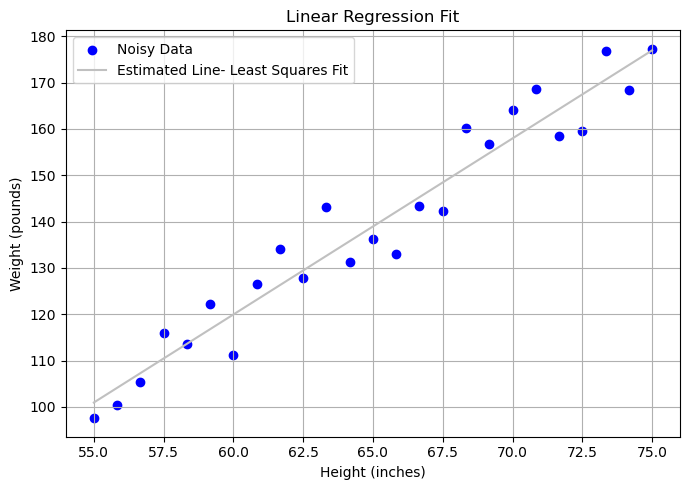

In [8]:
# Scatter plot of actual data
plt.figure(figsize=(7, 5))
plt.scatter(heights, weights, color='blue', label='Noisy Data')

# Line of best fit (predicted values)
x_line = np.linspace(min(heights), max(heights), 100)
y_line = w0_opt + w1_opt * x_line
plt.plot(x_line, y_line, color='silver', label='Estimated Line- Least Squares Fit')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

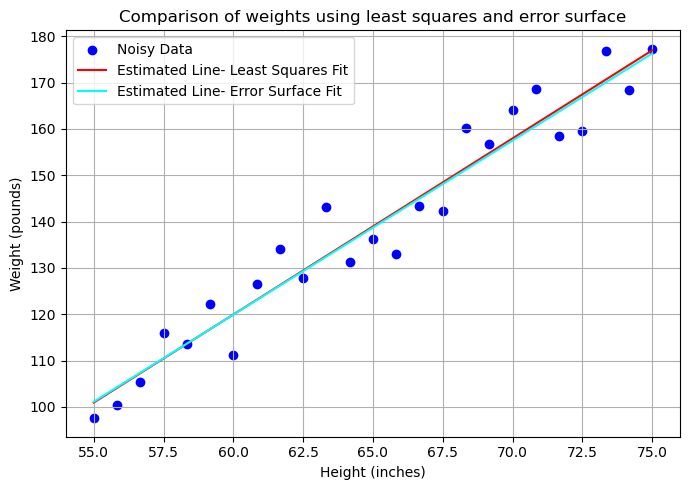

In [9]:
#Comparison of lines of best fit using least squares and error surface

# Scatter plot of actual data
plt.figure(figsize=(7, 5))
plt.scatter(heights, weights, color='blue', label='Noisy Data')

# Line of best fit (Least squares method)
x_line = np.linspace(min(heights), max(heights), 100)
y_line = w0_opt + w1_opt * x_line
plt.plot(x_line, y_line, color='red', label='Estimated Line- Least Squares Fit')

#Line of best fit (Error Surface method)
y_line1 = empirical_w0 + empirical_w1* x_line
plt.plot(x_line, y_line1, color='cyan', label='Estimated Line- Error Surface Fit')

plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Comparison of weights using least squares and error surface')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
#Compare the estimated weight's using least squares approach with the error surface approach
print(f"{'Approach':<20} {'w0':<15} {'w1':<15}")
print(f"{'True Values':<20} {w0_true:<15.2f} {w1_true:<15.2f}")
print(f"{'Empirical Values':<20} {empirical_w0:<15.2f} {empirical_w1:<15.2f}")
print(f"{'Least Squares':<20} {w0_opt:<15.2f} {w1_opt:<15.2f}")
print(f"{'MSE Least Squares':<20} {Error(w0_opt,w1_opt,weights,heights):<15.2f}")
print(f"{'MSE Error Surface':<20} {Error(empirical_w0,empirical_w1,weights,heights):<15.2f}")

Approach             w0              w1             
True Values          -100.42         3.86           
Empirical Values     -105.56         3.76           
Least Squares        -108.10         3.80           
MSE Least Squares    420.47         
MSE Error Surface    422.08         


**OBSERVATIONS**

1. Error surface shape: MSE(w0,w1) (mean squared error) is a convex quadratic function, forming a smooth paraboloid.The surface has a single global minimum (no local minima) which guarantees a unique solution.

2. The least squares solution given by provides the best linear fit to the noisy data under the assumption of minimizing the squared error.The estimated slope and intercept are close to the actual values.

  The weight values obtained from empirically minimizing the error surface (via mesh grid evaluation) closely matched the least squares solution. However, the MSE from the least squares method was slightly lower, as it computes the exact analytical minimum.

3. The error surface is useful for visualizing how model accuracy changes with different parameter values.

4. Although the least squares method is precise, it can be computationally expensive for large datasets due to the matrix inversion step. In such cases, we prefer iterative optimization techniques like gradient descent, stochastic gradient descent (SGD), or mini-batch methods which scale better with data.
